# predict DOB based on DNI number

DNI is the argentina's national id number.

This is an example of regression neural network model trained with a small dataset to predict the year a person was born based on the DNI.

The median error is ~6 years, but it could be improved easily with a larger dataset.


It uses tensorflow

## Dataset

The dataset was extracted from google.

Download the csv from [here](https://gist.githubusercontent.com/gipsh/d15a0d6d15f9b6736cb65c0777d6ae9a/raw/831e10a06dd42e2d3078e0305491225bd1134b84/csv)




In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [4]:
dni_ds = pd.read_csv("https://gist.githubusercontent.com/gipsh/d15a0d6d15f9b6736cb65c0777d6ae9a/raw/831e10a06dd42e2d3078e0305491225bd1134b84/csv")
dni_ds

,DNI,FECHA NACIMIENTO
0,35953586,7/24/1991
1,35740190,9/26/1993
2,23480873,8/22/1973
3,25098862,8/2/1979
4,26609629,6/5/1978
...,...,...
1184,37446427,3/10/1995
1185,37575944,4/8/1994
1186,26609635,6/7/1978
1187,10977030,10/15/1953


In [5]:
# build the data set for train and testing
X = dni_ds.drop("FECHA NACIMIENTO", axis=1)
y = dni_ds["FECHA NACIMIENTO"]

# we get only the year number for the first trial
x = map(lambda x: int(x.split("/")[2]), y)
y = np.array(list(x))

# scale the dni
ct = make_column_transformer(
    (MinMaxScaler(), ["DNI"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), [])
)

# split the sets 80% training / 20% test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)


ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [15]:
# lets build the fist model

# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
  ])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        #optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=100, verbose=False)



<Axes: >

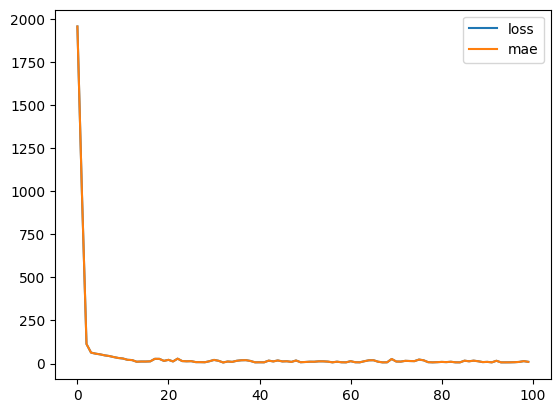

In [16]:
# lets draw the traing history
pd.DataFrame(history.history).plot()

In [7]:
# the mae looks ok (an error of 6 years)
model.evaluate(X_test_normal, y_test)

8/8 [==============================] - 0s 6ms/step - loss: 6.7255 - mae: 6.7255


[6.725504398345947, 6.725504398345947]

In [26]:
# one more test :)
model.predict([0.31752013])

1/1 [==============================] - 0s 65ms/step


array([[1992.0675]], dtype=float32)

8/8 [==============================] - 0s 4ms/step


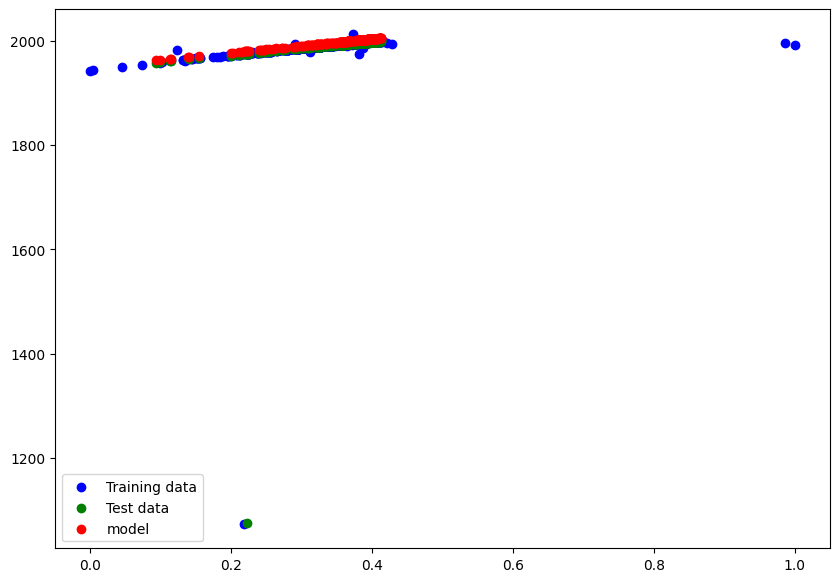

In [24]:
# lets visualize the predictions


y_pred = model.predict(X_test_normal)

plt.figure(figsize=(10,7))
plt.scatter(X_train_normal, y_train, c="b", label="Training data")
plt.scatter(X_test_normal, y_test, c="g", label="Test data")
plt.scatter(X_test_normal, y_pred, c="r", label="model")
plt.legend();
